In [1]:
### import basic libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.16.1


In [4]:
df = pd.read_csv('Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
## Divide df into independent n dependent features

X = df.iloc[:, 3:-1]
y = df.iloc[:, -1]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [9]:
### Feature engineering

geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [10]:
### concatenate these variables with dataframe

X.drop(['Geography', 'Gender'], axis=1, inplace=True)
X = pd.concat([X, gender, geography], axis=1)

In [11]:
binaries = {True: 1, False:0}
X.replace(binaries, inplace=True)

In [12]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [13]:
## Spliting dataset into train n test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [14]:
## feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [15]:
X_train.shape

(8000, 11)

In [16]:
X_test.shape

(2000, 11)

_____

### Part 2

____

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [18]:
### Lets inintialize the ANN

classifier = Sequential()

In [19]:
### Adding the input layer

classifier.add(Dense(units=11, activation='relu'))

## units – number of input features
## activation – activation function for layer

In [20]:
## Adding first hidden layer

classifier.add(Dense(units=7, activation='relu'))

In [45]:
## Adding second hidden layer

classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(rate=0.25))

In [46]:
## Adding third hidden layer

classifier.add(Dense(units=10, activation='relu'))

In [47]:
## Adding output layer

classifier.add(Dense(units=1, activation='sigmoid'))

In [48]:
import tensorflow

opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [49]:
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
%%time 
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8059 - loss: 0.4910 - val_accuracy: 0.8550 - val_loss: 0.3742
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.8536 - loss: 0.3628 - val_accuracy: 0.8535 - val_loss: 0.3740
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.8617 - loss: 0.3545 - val_accuracy: 0.8580 - val_loss: 0.3867
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.8608 - loss: 0.3471 - val_accuracy: 0.8614 - val_loss: 0.3735
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.8606 - loss: 0.3631 - val_accuracy: 0.8610 - val_loss: 0.3688
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.8619 - loss: 0.3441 - val_accuracy: 0.8523 - val_loss: 0.3758
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.8609 - loss: 0.3473 - val_accuracy: 0.8595 - val_loss: 0.3752
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.8711 - loss: 0.3

In [51]:
### Early stopping
import tensorflow as tf

In [52]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=5,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [53]:
%%time 
model_history = classifier.fit(
    X_train, y_train, 
    validation_split=0.33,
    batch_size=10,
    epochs=1000,
    callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.8754 - loss: 0.3228 - val_accuracy: 0.8538 - val_loss: 0.3755
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.8679 - loss: 0.3362 - val_accuracy: 0.8595 - val_loss: 0.3713
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.8761 - loss: 0.3094 - val_accuracy: 0.8580 - val_loss: 0.3662
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.8625 - loss: 0.3393 - val_accuracy: 0.8603 - val_loss: 0.3660
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.8684 - loss: 0.3208 - val_accuracy: 0.8629 - val_loss: 0.3599
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.8726 - loss: 0.3247 - val_accuracy: 0.8633 - val_loss: 0.3663
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.8711 - loss: 0.3255 - val_accuracy: 0.8591 - val_loss: 0.3734
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.8757 -

In [54]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

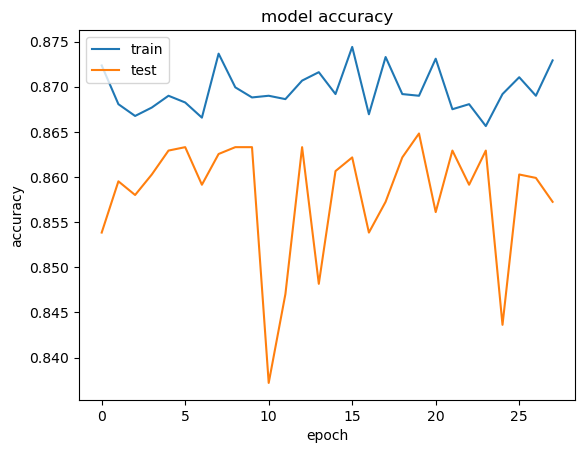

In [55]:
# summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

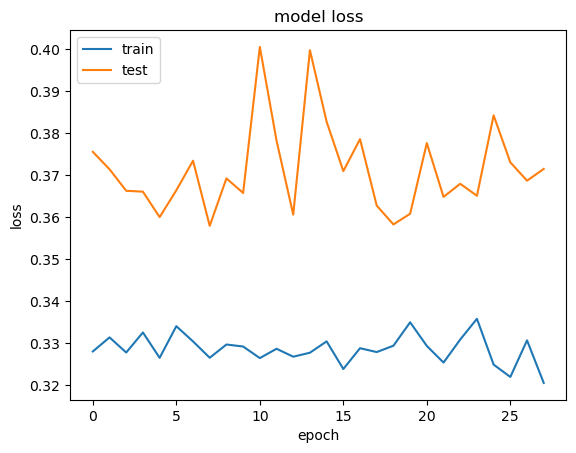

In [56]:
# summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [57]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step


In [61]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[1550,   45],
       [ 253,  152]])

In [59]:
score = accuracy_score(y_test, y_pred)
score

0.851

In [60]:
## Get the weights

classifier.get_weights()

[array([[ 1.0661874e+00, -4.5794629e-02,  4.0016217e+00, -6.0871089e-01,
          5.5483395e-01,  4.9159269e+00, -7.6931911e-03,  4.5252720e-01,
         -2.1787913e+00, -6.2949020e-01, -1.0335919e+00],
        [-5.8408899e+00,  1.5619912e+00, -2.3722119e+00, -1.4215029e+00,
         -1.0153710e+00, -3.4193964e+00,  4.1805239e+00, -3.7038732e-02,
         -4.1938891e+00,  9.4209681e+00,  3.8405091e-01],
        [-2.4064898e+00,  3.6565473e+00, -3.2696979e+00, -3.3154599e-02,
          1.1635524e+00, -1.5070099e+00,  7.1017273e-02,  1.4188786e-01,
          2.4784009e+00, -1.6546183e+00, -5.3837216e-01],
        [-4.9294567e+00, -2.0586808e+00,  8.7627137e-01, -7.9825020e+00,
         -1.2604706e+00, -1.6575502e+00, -2.4042890e+00, -7.1496167e+00,
         -1.7476313e+00,  1.0019550e+00,  2.3011992e+00],
        [ 3.5008693e+00, -3.4439943e+00,  3.5969081e+00,  1.9595034e-01,
          7.5189772e+00,  2.3089569e+00,  4.8130998e-01, -5.7356501e+00,
         -9.0600234e-01, -1.8513294e+0